In [2]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
import phenom
import phenom.plot

import pickle
import pandas as pd

In [5]:
s = pickle.load(open('temp/samples/posterior_0.pkl'))
design = pd.read_csv('temp/design.csv', index_col=0)

design.head()

,Intercept,"C(strain, levels=[""parent"", ""mutant""])[T.mutant]",Condition=stress,Condition=stress.1
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [6]:
s.keys()

[u'lengthscale',
 u'alpha',
 u'sigma',
 u'f_eta',
 u'f',
 u'df',
 u'lp__',
 'f-native',
 'df-native']

In [7]:
s['f-native'].shape

(4000, 4, 25)

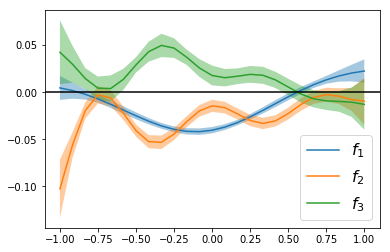

In [15]:
for i in range(1,4):
    phenom.plot.function.interval(np.linspace(-1, 1, 25), s['df-native'][:,i,:], label='$f_%d$'%i)
    
plt.axhline(0, c='k')
plt.legend(fontsize=16)

In [16]:
f = s['df-native'][:,3,:]

In [21]:
# number of significant timepoints
1.*sum((f.mean(0) - 1.98*f.std(0) > 0) | (f.mean(0) + 1.98*f.std(0) < 0)) / 25

0.64

(array([   8.,   55.,  224.,  652., 1035., 1049.,  658.,  253.,   55.,
          11.]),
 array([0.3786319 , 0.40402432, 0.42941674, 0.45480917, 0.48020159,
        0.50559401, 0.53098643, 0.55637885, 0.58177127, 0.60716369,
        0.63255611]),
 <a list of 10 Patch objects>)

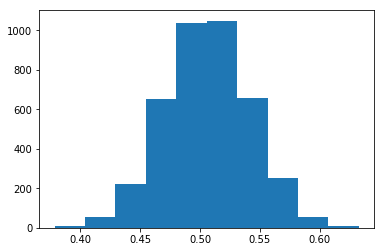

In [26]:
# od-delta norm
plt.hist(np.sqrt(f * f).sum(1))